In [159]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

import seaborn as sns

In [5]:
#Use the iris database to answer the following quesitons:
iris = data('iris')

In [10]:
iris = pd.DataFrame(iris)
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


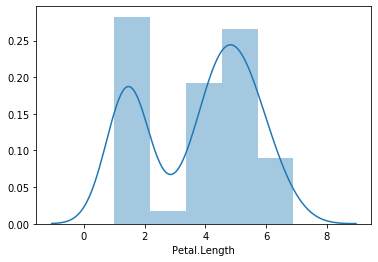

In [12]:
#What does the distribution of petal lengths look like?
sns.distplot(iris['Petal.Length'])


Object `pd.corr` not found.


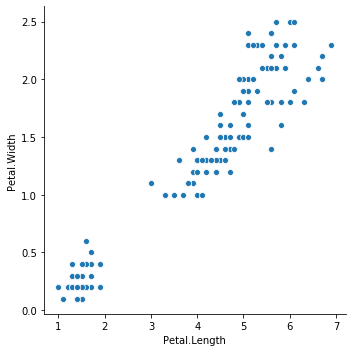

In [15]:
#Is there a correlation between petal length and petal width?
sns.relplot(x = 'Petal.Length', y = 'Petal.Width', data = iris)

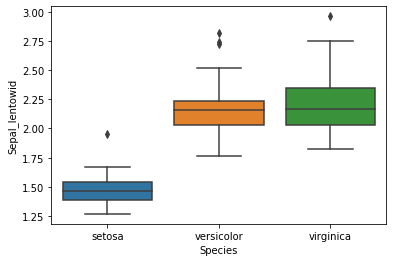

In [18]:
#Would it be reasonable to predict species based on sepal width and sepal length?
iris['Sepal_lentowid'] = iris['Sepal.Length']/iris['Sepal.Width']
sns.boxplot(data = iris, x = 'Species', y = 'Sepal_lentowid')

In [ ]:
# You could accurately guess teh setosa based on sepal length to width

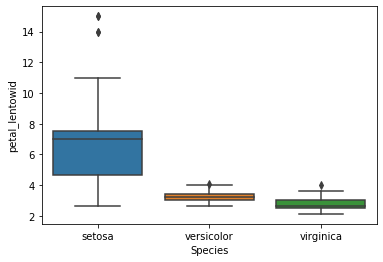

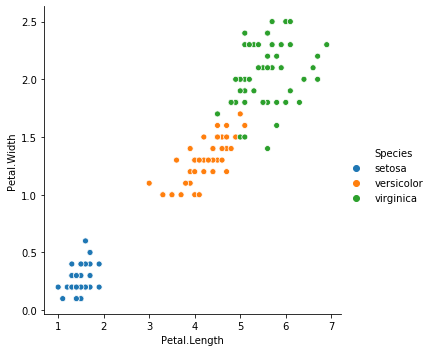

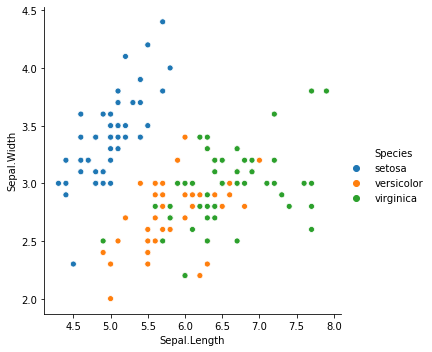

In [26]:
#Which features would be best used to predict species?
iris['petal_lentowid'] = iris['Petal.Length']/iris['Petal.Width']
sns.boxplot(data = iris, x = 'Species', y = 'petal_lentowid')
sns.relplot(data = iris, x = 'Petal.Length', y = 'Petal.Width',  hue = 'Species')
sns.relplot(data = iris, x = 'Sepal.Length', y = 'Sepal.Width',  hue = 'Species')
pd

In [30]:
#Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
dta = sns.load_dataset('anscombe')
dta.info()
dta.groupby('dataset').describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
dataset    44 non-null object
x          44 non-null float64
y          44 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Text(0.5, 1.0, 'IV')

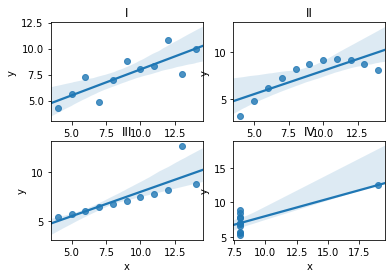

In [59]:
#Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
dta_1 = dta[dta.dataset == 'I']
dta_2 = dta[dta.dataset == 'II']
dta_3 = dta[dta.dataset == 'III']
dta_4 = dta[dta.dataset == 'IV']

plt.subplot(2,2,1)
sns.regplot(data = dta_1, x = 'x', y = 'y')
plt.title('I')

plt.subplot(2,2,2)
sns.regplot(data = dta_2, x = 'x', y = 'y')
plt.title('II')

plt.subplot(2,2,3)
sns.regplot(data = dta_3, x = 'x', y = 'y')
plt.title('III')

plt.subplot(2,2,4)
sns.regplot(data = dta_4, x = 'x', y = 'y')
plt.title('IV')

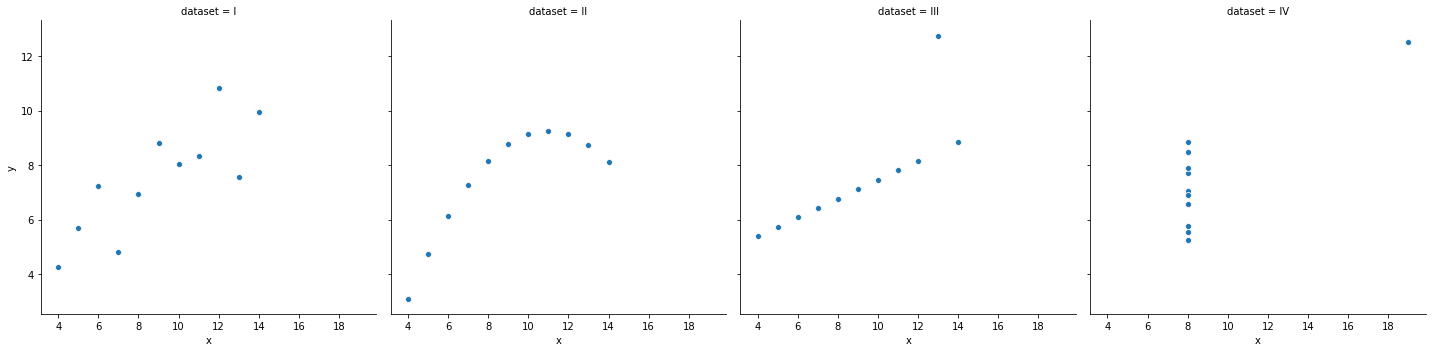

In [58]:
sns.relplot(data = dta, x = 'x', y = 'y', col = 'dataset')

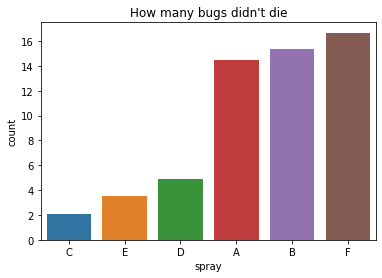

In [100]:
#Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

dta = data('InsectSprays')
avg_bugs_left = dta.groupby('spray').mean().sort_values(by = 'count')
sns.barplot(x = avg_bugs_left.index, y = 'count', data = avg_bugs_left) 
plt.title("How many bugs didn't die")
plt.show()

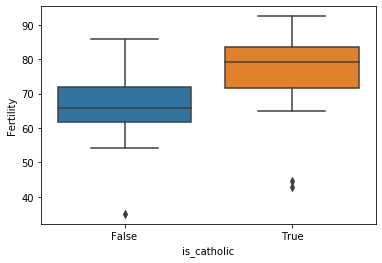

In [117]:
dta = data('swiss')
dta['is_catholic'] = dta['Catholic'] >= 50
# catholic_fertility = dta[['is_catholic', 'Fertility']].groupby('is_catholic').mean()
# catholic_fertility
sns.boxplot(data = dta, x = 'is_catholic', y = "Fertility")

       Fertility  Agriculture  Examination  Education   Catholic  \
count  47.000000    47.000000    47.000000  47.000000   47.00000   
mean   70.142553    50.659574    16.489362  10.978723   41.14383   
std    12.491697    22.711218     7.977883   9.615407   41.70485   
min    35.000000     1.200000     3.000000   1.000000    2.15000   
25%    64.700000    35.900000    12.000000   6.000000    5.19500   
50%    70.400000    54.100000    16.000000   8.000000   15.14000   
75%    78.450000    67.650000    22.000000  12.000000   93.12500   
max    92.500000    89.700000    37.000000  53.000000  100.00000   

       Infant.Mortality  
count         47.000000  
mean          19.942553  
std            2.912697  
min           10.800000  
25%           18.150000  
50%           20.000000  
75%           21.700000  
max           26.600000  


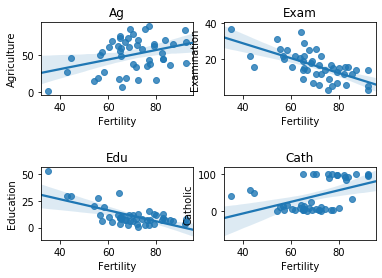

In [126]:
dta = data('swiss')
plt.subplot(2,2,1)
sns.regplot(data = dta, x = 'Fertility', y = 'Agriculture')
plt.title('Ag')

plt.subplot(2,2,2)
sns.regplot(data = dta, x = 'Fertility', y = 'Examination')
plt.title('Exam')

plt.subplot(2,2,3)
sns.regplot(data = dta, x = 'Fertility', y = 'Education')
plt.title('Edu')

plt.subplot(2,2,4)
sns.regplot(data = dta, x = 'Fertility', y = 'Catholic')
plt.title('Cath')

plt.subplots_adjust(hspace = 1)

In [153]:
#Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [133]:
def get_db_url(db_name):
    from env import user, password, host
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
url = get_db_url('chipotle')

In [146]:
data = pd.read_sql('SELECT * from orders', url)

In [135]:
type(data)

pandas.core.frame.DataFrame

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
id                    4622 non-null int64
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    4622 non-null object
item_price            4622 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.7+ KB


In [ ]:
data['item_price'] = data.item_price.str.replace('$','').apply(float)

In [152]:
most_popular = data[['item_name', 'quantity', 'item_price']].groupby('item_name')
bar_data = most_popular[['quantity', 'item_price']].apply(sum).sort_values('quantity').tail(4)
bar_data

,quantity,item_price
item_name,,
Steak Burrito,386.0,3851.43
Chips and Guacamole,506.0,2201.04
Chicken Burrito,591.0,5575.82
Chicken Bowl,761.0,7342.73


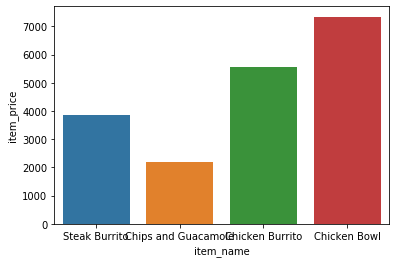

In [156]:
sns.barplot(x = bar_data.index, y = 'item_price', data = bar_data)

In [162]:
#Load the sleepstudy data and read it's documentation. Use seaborn 
#to create a line chart of all the individual subject's reaction 
#times and a more prominant line showing the average change in 
#reaction time.

stdy = data('sleepstudy')

In [181]:
stdy.info()
stdy.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
Reaction    180 non-null float64
Days        180 non-null int64
Subject     180 non-null int64
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


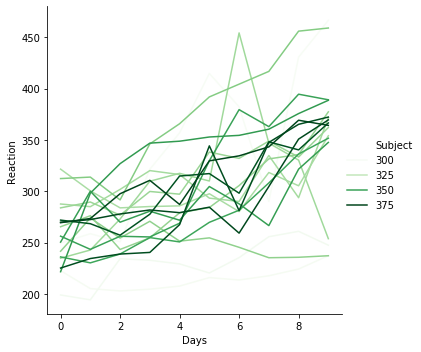

In [187]:
sns.relplot(x = 'Days', y = 'Reaction',hue = 'Subject',palette = 'Greens', data = stdy, kind = 'line')